In [1]:
import pandas as pd

In [2]:
irisData=pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/curric-data-001-data-sets/master/iris/iris.data.csv', header=None)
irisData.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
header_list=['sep_len', 'sep_wid', 'pet_len', 'pet_wid', 'species']
irisData.columns = header_list
irisData.tail()


,sep_len,sep_wid,pet_len,pet_wid,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
list(irisData.columns.values)

['sep_len', 'sep_wid', 'pet_len', 'pet_wid', 'species']

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.scatter(irisData.sep_len, color='r' irisData.sep_wid) #or use the following
#color = [str(item/255.) for item in y]
#a = 1 if i<100 else 2 if i>100 else 0
#f = lambda x: 1 if x>0 else 0 if x ==0 else -1
c=irisData.species.map(lambda x: 1 if x =='Iris-setosa' else 3 if x=='Iris-virginica' else 5)
#c=irisData.species.map(lambda x: 'red' if x =='Iris-setosa' else 'green' if x=='Iris-virginica' else 'blue')
#c=iter(c)
#c=c.tolist()
#c=itertools(c)

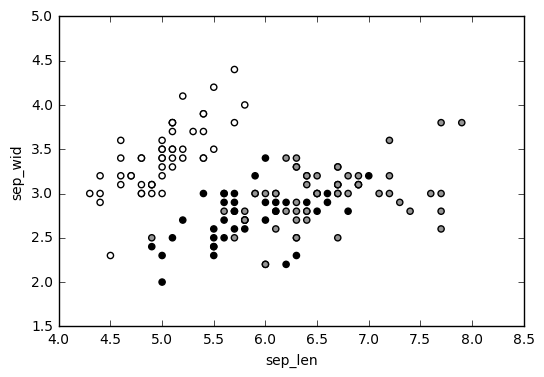

In [58]:
# df.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax);
irisData.plot.scatter(x='sep_len', y='sep_wid', color =c)

In [59]:
#selecting a random index from 0 to length of series
import numpy as np

test_idx= int(np.random.uniform(0, len(irisData))) 
test_idx

83

In [64]:
#r**2=y**2 + x**2 and find sqrt of r - will give the distance
#professions_dict[names[i]] = professions[i]
def dist_sort(df):
    dist_list = []
    dist_dict={}
    for idx in range(0, len(irisData)):
        #print((df.sep_len[idx]-irisData.sep_len[test_idx])**2)  #working
        x_sq=(df.sep_len[idx]-irisData.sep_len[test_idx])**2
        y_sq=(df.sep_wid[idx]-irisData.sep_wid[test_idx])**2
        r=(x_sq + y_sq)**.5
        dist_dict[r]=idx
        dist_list.append(r)
    #return dist_list
    return dist_dict
        
        
a=dist_sort(irisData)
#a

In [65]:
#ordring the dict according to key or distace
# od = collections.OrderedDict(sorted(d.items()))
#first2pairs = {k: mydict[k] for k in mydict.keys()[:2]}

import collections
sorted_dict=collections.OrderedDict(sorted(a.items()))
#sorted_dict  #working

In [72]:
dict_of_ten={}
for key in sorted(sorted_dict)[:10]:
    dict_of_ten[key]=  sorted_dict[key]
    #dict_of_ten[key]=  irisData.species(sorted_dict[key])
#dict_of_ten


In [73]:
#for i in range (10):
knn_list=[]
for k, v in dict_of_ten.items():
    #print(irisData.species[v])
    knn_list.append(irisData.species[v])
#knn_list    

In [74]:
knn_count=collections.Counter(knn_list)
knn_count

Counter({'Iris-versicolor': 6, 'Iris-virginica': 4})

In [76]:
#knn_count.hist()

In [77]:
'''
from collections import Counter
>>> d = {(1, 2): 2, (3, 1): 2, (4, 4): 1, (5, 6): 4}
>>> Counter(d.values())
Counter({2: 2, 1: 1, 4: 1})
'''
from collections import Counter
Counter(dict_of_ten.keys())

Counter({0.0: 1,
         0.141421356237309: 1,
         0.14142135623730931: 1,
         0.19999999999999973: 1,
         0.20000000000000018: 1,
         0.22360679774997858: 1,
         0.22360679774997896: 1,
         0.22360679774997916: 1,
         0.28284271247461895: 1,
         0.29999999999999982: 1})

([<matplotlib.axis.XTick at 0x1600ef8fa58>,
 <a list of 2 Text xticklabel objects>)

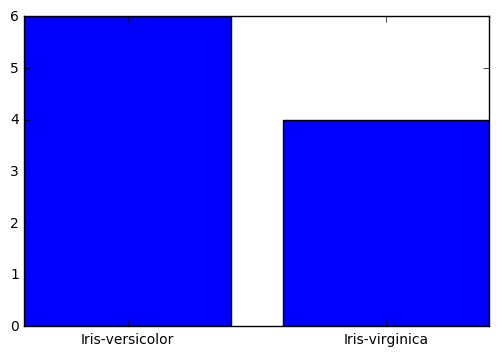

In [87]:
#plotting the 10 nearest neighbors
plt.bar(range(len(knn_count)), knn_count.values(), align='center')
plt.xticks(range(len(knn_count)), knn_count.keys())

In [86]:
#verifying the actual species in data
irisData.iloc[83]

sep_len                  6
sep_wid                2.7
pet_len                5.1
pet_wid                1.6
species    Iris-versicolor
Name: 83, dtype: object

In [82]:
#index derived randomly
test_idx

83